# MiCRM package

### Generating Community Parameters

In [3]:
using Pkg
Pkg.add("Distributions")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [31c24e10] + Distributions v0.25.90
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [31c24e10] ↑ Distributions v0.25.89 ⇒ v0.25.90


In [4]:
using Distributions

# set system size and leakage
N, M, leakage = 10, 10, 0.3

# uptake
du = Distributions.Dirichlet(N, 1.0)
u = copy(rand(du, M)')

# cost term
m = ones(N)

# inflow + outflow
ρ, ω = ones(M), ones(M)

# leakage
l = copy(rand(du, M)' .* leakage)

param = (N = N, M = M, u = u, m = m, ρ = ρ, ω = ω, l = l, λ = leakage)

[ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]


(N = 10, M = 10, u = [0.04019053941891198 0.12196072241715246 … 0.2181432419176696 0.03611802547368172; 0.02339770462976868 0.15374813293014764 … 0.0010606172094616904 0.23942426219881022; … ; 0.11542428010419811 0.04346447899299596 … 0.19091042525439986 0.02346077155896976; 0.0328134790902673 0.19630051501110876 … 0.23600717337684796 0.08812821424103565], m = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ρ = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ω = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], l = [0.017300155979117403 0.02635995344501101 … 0.06330989805762137 0.03130843802387723; 0.00633068347527836 0.015502073614800776 … 0.05705060313712076 0.02620847354842003; … ; 0.07784875396601802 0.034827235032568765 … 0.0026966008281714077 0.035744484744009146; 0.0247023101259967 0.055367389633316104 … 0.001424799310855647 0.0186918046960821], λ = 0.3)

The above process is simplified in the MiCRM package

In [6]:
using Pkg
Pkg.add(path = "https://github.com/CleggTom/MiCRM.jl")

    Updating git-repo `https://github.com/CleggTom/MiCRM.jl`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [a39c0ef7] + MiCRM v0.0.2 `https://github.com/CleggTom/MiCRM.jl#main`
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [a39c0ef7] + MiCRM v0.0.2 `https://github.com/CleggTom/MiCRM.jl#main`


In [20]:
using MiCRM

#set system size and leakage
N,M,leakage = 10,10,0.3

#generate community parameters
param = MiCRM.Parameters.generate_params(N,M, λ = leakage)

(N = 10, M = 10, u = [0.05286336358331556 0.04385566966062841 … 0.25938992464205046 0.06510404518675472; 0.06880527251888954 0.21344049136042212 … 0.09126501024486441 0.1828697613982809; … ; 0.0020091660422588906 0.1696615724603731 … 0.04357431583668353 0.07105028925795102; 0.03981504045080045 0.0445405604564468 … 0.025055421337655225 0.1352223850211905], m = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ρ = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], ω = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], l = [0.05428468716431252 0.01082664138315977 … 0.018502088965076907 0.005580548166727029; 0.0033097138633827 0.024355465204808992 … 0.044032227869188 0.01251865008215033; … ; 0.03833216357136677 0.1328580880433977 … 0.006827205345855472 0.02241590948035778; 0.01205356147610514 0.03119343471461076 … 0.038559826126537064 0.015789398013716153], kw = (λ = 0.3,))

### Simulation

In [22]:
using DifferentialEquations
# inital state
x0 = ones(N+M)

#time span
tspan = (0.0, 10.0)

#define problem
prob = ODEProblem(MiCRM.Simulations.dx!, x0, tspan, param)
sol = solve(prob, Tsit5())

[ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 16-element Vector{Float64}:
  0.0
  0.09488556337034301
  0.26173707136746316
  0.4654404144802399
  0.7304629383020304
  1.0556758976753806
  1.462899047816075
  1.9603880179117679
  2.5632044113553416
  3.279216611822007
  4.128229331381158
  5.133808150519142
  6.331284678754787
  7.756087795905872
  9.409586712869364
 10.0
u: 16-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [0.9698704072515835, 0.9695241784832469, 0.9695134161157878, 0.9695250896087688, 0.9693101449477546, 0.9699649840189243, 0.9697087900484881, 0.9701804967235783, 0.9694553024253092, 0.9692542826770415, 0.9671786786858283, 0.943383004370393, 0.9536089340373071, 0.9448142353095015, 0.8898550590437426, 0.9478183118123893, 0.9059106925844004, 0.9775847169702313, 0.9420196170530963, 0.9262897182509459]
 [0.911197099570091, 0.9091257973400622, 0.90908939

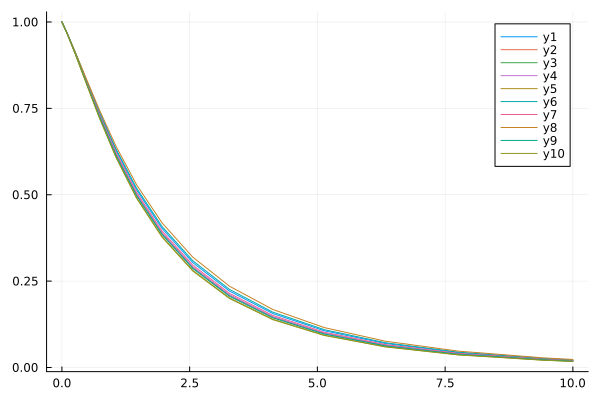

In [37]:
using Plots
# plotting the consumer populations
C = reduce(hcat, sol.u)'[:, 1:N]
plot(sol.t, C)

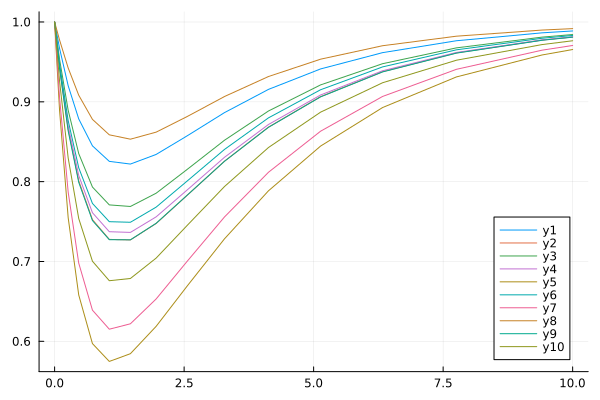

In [38]:
#plotting the resource abundance
R = reduce(hcat, sol.u)'[:, N+1:N+M]
plot(sol.t, R)

In [39]:
sol[end] # final states of community

20-element Vector{Float64}:
 0.020915235423991003
 0.01888354203164482
 0.01892909694770556
 0.019065506422626964
 0.017763434243059026
 0.021677182327281393
 0.019846557767076452
 0.023202222702495313
 0.018515639141674953
 0.01750056142395899
 0.9887785328405098
 0.9811961948590077
 0.9843043524034288
 0.9813905235412812
 0.9655363382619415
 0.9831337829512035
 0.9706173004267429
 0.9916927731249725
 0.9810275495283617
 0.9764990901413588